<a href="https://colab.research.google.com/github/JpDrigues/nodemcu/blob/main/Gerador_de_Gr%C3%A1ficos_Mec%C3%A2nica_dos_Materiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O que você deseja fazer? 

(1) Apresentar comparação entre o gráfico tensão deformação de engenharia e verdadeira   
 
(2) Apresentar o gráfico com ajuste de Hollomon   

(3) Apresentar o gráfico com ajuste de Tian e Zhang  

(4) Apresentar o gráfico com ajuste de Zhou   

1


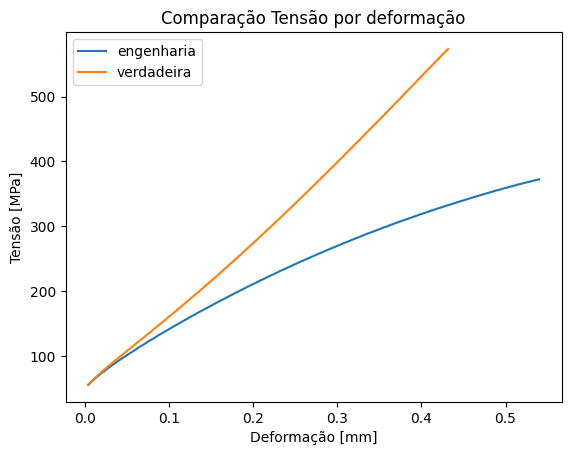

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit


df = pd.read_excel('dados_materiais_Cu.xlsx')

df['def_e+1'] = df['def_e'] + 1


def_v = np.log(df['def_e+1'])

df["ten_v"]=df["def_e+1"]*df["ten_e"]


def Grafico():
    entrada_1 = str(input('O que você deseja fazer? \n'
                          '\n'
                    '(1) Apresentar comparação entre o gráfico tensão deformação de engenharia e verdadeira   \n'
                    ' \n'
                    '(2) Apresentar o gráfico com ajuste de Hollomon   \n'
                    '\n'
                    '(3) Apresentar o gráfico com ajuste de Tian e Zhang  \n'
                    '\n'
                    '(4) Apresentar o gráfico com ajuste de Zhou   \n'
                    '\n'
                    ''))

#Comparação de tensão verdadeira vs engenharia

    if entrada_1 == '1':
        plt.plot(df["def_e"],df["ten_e"], label='engenharia')
        plt.plot(def_v, df["ten_v"], label='verdadeira')
        plt.xlabel('Deformação [mm]')
        plt.ylabel('Tensão [MPa]')
        plt.title('Comparação Tensão por deformação')
        plt.legend()


#Modelo de Hollomon:

    elif entrada_1 == '2':
        def_h = np.log(def_v)
        ten_h = np.log(df['ten_v'])

        def model_f(x,a,b):
          return a*x+b
        popt, pcov = curve_fit(model_f, def_h, ten_h, p0=[0.5322,6.2348])

        a_opt, b_opt, = popt
        x_model = np.linspace(min(def_h), max(def_h), 100)
        y_model = model_f(x_model, a_opt, b_opt)

        k = np.exp (b_opt)

        plt.plot(def_h, ten_h, label='dados')
        plt.xlabel('ln da deformação verdadeira [mm]')
        plt.ylabel('ln da tensão verdadeira [MPa]')
        plt.title('Gráfico com ajuste de Hollomon')
        plt.plot(x_model, y_model, color='r', ls = '--', label='ajuste')
        plt.legend()



        print(
        '\n'
        'Os parâmetros da equação de Hollomon são: \n'
        '\n'
        'k = ',k, '\n'
        'n = ', a_opt,
        '\n')


#Modelo de Tian e Zhang:

    elif entrada_1 == '3':
        def_h = np.log(def_v)
        ten_h = np.log(df['ten_v'])


        def model_f(x,a,b,c):
          return a*(x**2)+b*x+c
        popt, pcov = curve_fit(model_f, def_h, ten_h, p0=[0.0461,0.7173,6.3766])

        a_opt, b_opt, c_opt = popt
        x_model = np.linspace(min(def_h), max(def_h), 100)
        y_model = model_f(x_model, a_opt, b_opt, c_opt)

        k = np.exp(c_opt)

        plt.plot(def_h, ten_h, label='dados')
        plt.xlabel('ln da deformação verdadeira [mm]')
        plt.ylabel('ln da tensão verdadeira [MPa]')
        plt.title('Gráfico com ajuste de Tian e Zhang')
        plt.plot(x_model, y_model, color='r', ls = '--', label='ajuste')
        plt.legend()

        print(
        '\n'
        'Os parâmetros da equação Tian e Zhang são: \n'
        '\n'
        'k = ',k, '\n'
        'n1 = ', b_opt, '\n'
        'n2 = ', a_opt,
        '\n')



#Modelo de Zhou

    elif entrada_1 == '4':
        lim_esc = float(input('Digite o valor do limete de escoamente [MPa]: '))
        df["ten_v-52"]=df["ten_v"] - lim_esc
        def_z = np.log(def_v)
        ten_z = np.log(df['ten_v-52'])

        def model_f(x,a,b):
          return a*x+b
        popt, pcov = curve_fit(model_f, def_z, ten_z, p0=[0.8102,6.337])

        a_opt, b_opt, = popt
        x_model = np.linspace(min(def_z), max(def_z), 100)
        y_model = model_f(x_model, a_opt, b_opt)

        k = np.exp(b_opt)

        plt.plot(def_z, ten_z, label='dados')
        plt.xlabel('ln da deformação verdadeira [mm]')
        plt.ylabel('ln da tensão verdadeira [MPa]')
        plt.title('Gráfico com ajuste de Zhou')
        plt.plot(x_model, y_model, color='r', ls = '--', label='ajuste')
        plt.legend()

        print(
        '\n'
        'Os parâmetros da equação de Zhou são: \n'
        '\n'
        'k = ',k, '\n'
        'n = ', a_opt,
        '\n')


    else:
        print('Opção inválida')
        Grafico()


Grafico()